# Installations

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install svd2vec

In [ ]:
!git clone https://github.com/valentinp72/svd2vec

fatal: destination path 'svd2vec' already exists and is not an empty directory.


In [ ]:
!cp -r svd2vec/svd2vec/datasets .

In [ ]:
!wget http://mattmahoney.net/dc/text8.zip -O text8.gz
!gzip -d text8.gz -f

--2022-05-09 10:47:39--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 67.195.197.24
Connecting to mattmahoney.net (mattmahoney.net)|67.195.197.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.gz’

text8.gz            100%[===================>]  29.89M   700KB/s    in 44s     

2022-05-09 10:48:23 (697 KB/s) - ‘text8.gz’ saved [31344016/31344016]



# En utilisant SVD2VEC

In [ ]:
import svd2vec

In [ ]:
# Building
from svd2vec import svd2vec
documents = [open("text8", "r").read().split(" ")]
svd = svd2vec(documents, window=2, min_count=100)

## Similarité

In [ ]:
svd.similarity("monday", "friday")

0.5599762972168569

In [ ]:
svd.similarity("monday", "banana")

0.16505099716256302

In [ ]:
svd.similarity("king", "queen")

0.4921871571870824

In [ ]:
svd.similarity("man", "woman")

0.35744840201318434

In [ ]:
svd.similarity("banana", "orange")

0.11602496563936542

In [ ]:
svd.similarity("eat", "food")

0.5569393053388805

## Analogie

In [ ]:
svd.analogy("paris", "france", "berlin")

[['brabant', 0.3745552845233916],
 ['bremen', 0.3737630881082196],
 ['saxony', 0.36824581048819993],
 ['norway', 0.3597651267287262],
 ['lorraine', 0.3571713965462988],
 ['flanders', 0.35705468666728946],
 ['germany', 0.3454979078624748],
 ['poland', 0.3399347876135093],
 ['annexation', 0.3274614777422991],
 ['sweden', 0.3264021003640242]]

In [ ]:
svd.analogy("road", "cars", "rail")

[['diesel', 0.605747288440109],
 ['trucks', 0.5137565921313029],
 ['car', 0.5102133967488149],
 ['vehicles', 0.510145122303149],
 ['motors', 0.5047802489712563],
 ['motorcycles', 0.5034438578854786],
 ['vehicle', 0.500440746517432],
 ['manufactured', 0.4923702903853018],
 ['aircraft', 0.4774263370011446],
 ['benz', 0.4740606060440655]]

In [ ]:
svd.analogy("black", "white", "dark")

[['pale', 0.44323763782862746],
 ['transparent', 0.41435882186957645],
 ['colored', 0.4137556480245126],
 ['bright', 0.4095655440961031],
 ['colour', 0.4042938003481756],
 ['olive', 0.3949755049692809],
 ['shadows', 0.39330400037965946],
 ['shade', 0.38416908737460376],
 ['slightly', 0.38076317324377296],
 ['colors', 0.37647798638625346]]

In [ ]:
svd.analogy("christian", "church", "islam")

[['practices', 0.43028505716150317],
 ['disciples', 0.4036318318527658],
 ['heretical', 0.39290243601808034],
 ['temples', 0.3867961218903799],
 ['sects', 0.37132563288166365],
 ['rite', 0.3621458854312012],
 ['priests', 0.35957098801988713],
 ['congregation', 0.35394752189979234],
 ['burned', 0.3454536122052993],
 ['coptic', 0.33771851218781873]]

In [ ]:
svd.analogy("islam", "mosque", "christianity")

[['demolished', 0.4922970594258461],
 ['chapel', 0.44142824810256914],
 ['buildings', 0.4323059996621555],
 ['arch', 0.4162216287097526],
 ['cathedral', 0.4142736504549045],
 ['fountain', 0.4129726933058343],
 ['statue', 0.396811303537854],
 ['towers', 0.38778605257620125],
 ['tower', 0.3870699374799306],
 ['orthodox', 0.3828196936450155]]

# Version Personnalisée avec Transformations

## Transformations

In [ ]:
class IdentityTransform:
  def __init__(self):
    pass
  
  def transform(self, matrix):
    return matrix

  def get_name(self):
    return "Identity"

In [ ]:
class PowerTransform:
  def __init__(self, p):
    self.p = p
  def transform(self, data):
    return data.power(self.p, dtype=None)

  def get_name(self):
    return "Power"

In [ ]:
from scipy.sparse import diags
class PMITransform:
  def __init__(self):
    pass
  def transform(self, data):
    # convert x to probability matrix & marginal probability 
    px = (data.sum(axis=1) / data.sum()).reshape(-1)
    py = (data.sum(axis=0) / data.sum()).reshape(-1)
    pxy = data / data.sum()

    #Transformez les lignes en liste, puis créez une matrice diagonale avec des éléments diagonaux.
    px_diag = diags(px.tolist()[0])
    py_diag = diags(py.tolist()[0])
    alpha = 0.0001 # acts as p(y) threshold

    px_diag.data[0] = np.asarray([0 if v == 0 else 1/v for v in px_diag.data[0]])
    py_diag.data[0] = np.asarray([0 if v == 0 else 1/(v + alpha) for v in py_diag.data[0]])

    mat_transformed = px_diag.dot(pxy).dot(py_diag)

    return mat_transformed

  def get_name(self):
    return "PMI"

In [ ]:
from scipy.sparse import diags
class PPMITransform:
  def __init__(self):
    pass
  def transform(self, data):
    # convert x to probability matrix & marginal probability 
    px = (data.sum(axis=1) / data.sum()).reshape(-1)
    py = (data.sum(axis=0) / data.sum()).reshape(-1)
    pxy = data / data.sum()

    #Transformez les lignes en liste, puis créez une matrice diagonale avec des éléments diagonaux.
    px_diag = diags(px.tolist()[0])
    py_diag = diags(py.tolist()[0])
    alpha = 0.0001 # acts as p(y) threshold

    px_diag.data[0] = np.asarray([0 if v == 0 else 1/v for v in px_diag.data[0]])
    py_diag.data[0] = np.asarray([0 if v == 0 else 1/(v + alpha) for v in py_diag.data[0]])

    pmi = px_diag.dot(pxy).dot(py_diag) 
    pmi[pmi<0] = 0
    return pmi
    
  def get_name(self):
    return "PPMI"

In [ ]:
class AFCTransform:
  def __init__(self):
    pass
  def transform(self, data):
    sum_nij = np.sum(data)
    normalized_matrix = data/sum_nij #fij
    total_row = np.sum(normalized_matrix, axis=1) #fi.
    total_col = np.sum(normalized_matrix, axis=0) #f.j
    multfpoint = np.sqrt(total_row.reshape(total_row.size, 1).dot(total_col.reshape(1, total_col.size)))
    normalized_matrix = normalized_matrix / multfpoint
    # a = fij/total_row
    # b = fij/total_col
    return normalized_matrix

  def get_name(self):
    return "AFCTransform"

In [ ]:
import numpy as np
from scipy import sparse
class STransform:
  def __init__(self):
    pass
  def transform(self, data):
    P = (1/data.shape[0])*data
    r = np.array(P.sum(axis=0))
    c = np.array(P.sum(axis=1))
    a = np.dot(r.T,c.T)
    e = P-a
    del P
    del a
    Dr = np.sqrt(np.diag((np.asarray(r)).flatten()))
    del r
    e = Dr.dot(e)
    del Dr
    Dc = np.sqrt(np.diag((np.asarray(c)).flatten()))
    del c
    return e.dot(Dc)
  
  def get_name(self):
    return "STransform"

In [ ]:
import random
class SAlphaTransform:
  def __init__(self, alpha):
    self.alpha = alpha

  def transform(self, data):
    ss = data.sum()
    P = ((1/data.shape[0])*data).todense()
    r = P.sum(axis=0)
    c = P.sum(axis=1)
    Dr = np.diag((np.asarray(r)).flatten())
    Dc = np.diag((np.asarray(c)).flatten())
    return np.sqrt(Dr).dot((np.power(P, self.alpha))-np.dot(r,c)).dot(np.sqrt(Dc))

  def get_name(self):
    return "SAlphaTransform"

In [ ]:
class QTransform:
  def __init__(self):
    pass
  def transform(self, data):
    P = data / data.shape[0]
    del data
    r = np.asarray(P.sum(axis=0)).flatten()
    c = np.asarray(P.sum(axis=1)).flatten()
    rootDr = np.diag(np.sqrt(r))
    del r
    P = P.todense()
    rootDrP = rootDr.dot(P)
    del rootDr
    del P
    rootDc = np.diag(np.sqrt(c))
    del c
    return rootDrP.dot(rootDc)

  def get_name(self):
    return "QTransform"

## Utilitaires

In [ ]:
class TopKFinder:
  def __init__(self, k):
    self.k = k
    self.list_topk = []
  
  def add(self, key, value):
    if len(self.list_topk) == 0:
      self.list_topk.append((key, value))
    else:
      index_insert = -1
      for i in range(len(self.list_topk)):
        if self.list_topk[i][1] < value:
          index_insert = i
          break
      
      if index_insert < 0: # si la liste a été parcourue en entier 
        if len(self.list_topk) < self.k: # si liste n'a pas ateint k elems => insérer
          self.list_topk.append((key, value))
      else:
        self.list_topk.insert(index_insert, (key, value))
        if len(self.list_topk) > self.k:
          self.list_topk = self.list_topk[:self.k]

  def get_topk(self):
    return self.list_topk

In [ ]:
tkfind = TopKFinder(3)
tkfind.add("word5", 5)
tkfind.add("word1", 1)
tkfind.add("word2", 2)
tkfind.add("word3", 3)
tkfind.add("word4", 4)

In [ ]:
tkfind.get_topk()

[('word5', 5), ('word4', 4), ('word3', 3)]

## Matrice de Cooccurences avec Contexte

In [ ]:
import gensim.downloader as api
dataset = api.load("text8")

In [ ]:
t8 = [" ".join(t) for t in dataset]

In [ ]:
len(t8)

1701

In [ ]:
t8_tok = [t for t in dataset]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import coo_matrix
from tqdm import tqdm_notebook
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


class Co_Occ:
  def __init__(self, documents, window_size_bef_af=2, min_count = 50, DEBUG = True):
    self.vocab = None
    self.min_count = min_count
    self.set_vocab(documents, min_count = min_count)
    self.word_to_id = {word:i for i, word in enumerate(self.vocab_list)}
    self.id_to_word = {self.word_to_id[word]:word for word in self.word_to_id}
    self.co_occ_matrix = self.create_co_occ(documents, window_size_bef_af, DEBUG = DEBUG)

  def create_co_occ(self, documents, window_size_bef_af=2, DEBUG = True):
    mat_context = dict()
    row = []
    col = []
    val = []
    if DEBUG:
      range_object = tqdm_notebook(range(len(documents)))
    else:
      range_object = range(len(documents))
    for j in range_object:
      doc = documents[j]
      doc = [word for word in doc if word in self.freq and self.freq[word] >= self.min_count]
      for i, word in enumerate(doc):
        if word in self.vocab:
          min_val = i - window_size_bef_af
          max_val = i + window_size_bef_af
          if min_val >= 0:
            for k in range(-window_size_bef_af, 0):
              if k != 0:
                if doc[i + k] in self.vocab:
                  if (word, doc[i + k]) not in mat_context:
                    mat_context[(word, doc[i + k])] = 0
                  mat_context[(word, doc[i + k])] += 1
          if max_val < len(doc):
            for k in range(1, window_size_bef_af + 1):
              if k != 0:
                if doc[i + k] in self.vocab:
                  if (word, doc[i + k]) not in mat_context:
                    mat_context[(word, doc[i + k])] = 0
                  mat_context[(word, doc[i + k])] += 1

    for w, c in mat_context:
      row.append(self.word_to_id [w])
      col.append(self.word_to_id [c])
      val.append(mat_context[(w, c)])
    mat_coo_ctx = coo_matrix((val, (row, col)), shape = (len(self.vocab), len(self.vocab)))
    return mat_coo_ctx


  def set_vocab(self, corpus, min_count=50):
    freq = {}
    stops = set(stopwords.words('english'))

    for i in range(len(corpus)):
      doc = corpus[i]
      for i, word in enumerate(doc):
        if word in stops:
          continue
        if word in freq:
          freq[word]+=1
        else:
          freq[word]=1
    self.freq = freq
    voc = [k for k,v in freq.items() if v >= min_count]
    self.vocab= set(voc)
    self.vocab_list = list(self.vocab)

  def get_matrix(self):
    return self.co_occ_matrix
  
  def get_vocab(self):
    return self.vocab_list
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## SVD2VEC Customisé avec Transformations

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds
class Svd2VecWithTransform:
  def __init__(self, documents, DOCS = True, emb_size = 300, transformation = None, window = 10, min_count = 1, eig_power = 0, DEBUG = True):
    # initialisations
    self.word_to_vector = dict()
    self.word_to_context = dict()
    #words_list = ["hello", "it", "is", "me", "testing", "something", "for", "this", "code", "to", "work", "well"]
    if transformation is None:
      transformation = IdentityTransform()

    # créer la matrice count
    if DOCS:
      stops = set(stopwords.words('english'))
      documents = [[word for word in doc if word not in stops] for doc in documents]
      doc2count = Co_Occ(documents, window_size_bef_af = window, min_count = min_count, DEBUG = DEBUG)
    else:
      doc2count = documents # récupérer l'objet doc2count

    count_matrix = doc2count.get_matrix()
    words_list = doc2count.get_vocab()
    
    # effectuer la transformation de la matrice de counts
    transformed_matrix = transformation.transform(count_matrix)
    
    # effectuer une SVD
    svd = TruncatedSVD(n_components=emb_size)

    US = svd.fit_transform(transformed_matrix)
    
    V = svd.components_
    S = svd.singular_values_ 
    
    '''
    transformed_matrix = transformed_matrix.asfptype()
    US, S, V = svds(transformed_matrix, k = emb_size)
    print("SVD Shapes :")
    print(US.shape)
    print(S.shape)
    print(V.shape)
    print()
    '''

    W = US * np.power(S, eig_power)
    C = V.T
    # sauvegarder les vecteurs de mots dans un dictionnaire
    for i, word in enumerate(words_list):
      self.word_to_vector[word] = W[i, :]# + C[i, :]
      self.word_to_context[word] = C[i, :]
  
  def compute_cosine_similarity(u, v, eps = 10**(-4)):
    return u.dot(v)/ (np.linalg.norm(u) * np.linalg.norm(v) + eps)
  
  def get_similarity(self, w1, w2):
    return Svd2VecWithTransform.compute_cosine_similarity(self.word_to_vector[w1], self.word_to_vector[w2])

  def get_analogy(self, w1, w2, v1, k = 10): # w1 is to w2 as v1 is to ??? (w1 -> w2, v1 -> ?)
    vec_w1 = self.word_to_vector[w1]
    vec_w2 = self.word_to_vector[w2]
    vec_v1 = self.word_to_vector[v1]

    #to_compare = vec_w2/np.linalg.norm(vec_w2) - vec_w1/np.linalg.norm(vec_w1) + vec_v1/np.linalg.norm(vec_v1)
    to_compare = vec_w2 - vec_w1 + vec_v1
    tkfinder = TopKFinder(k)
    for word in self.word_to_vector:
      if word == w1 or word == w2 or word == v1:
        continue
      wordvec = self.word_to_vector[word]
      #wordvec = wordvec/np.linalg.norm(wordvec)
      sim = Svd2VecWithTransform.compute_cosine_similarity(wordvec, to_compare)
      tkfinder.add(word, sim)

    return tkfinder.get_topk()

  def get_most_similar(self, word, k = 1):
    tkfinder = TopKFinder(k)
    for to_compare in self.word_to_vector:
      if to_compare == word:
        continue
      sim = Svd2VecWithTransform.compute_cosine_similarity(self.word_to_vector[to_compare], self.word_to_vector[word])
      tkfinder.add(to_compare, sim)

    return tkfinder.get_topk()

### Importer datasets référence

#### Similarities

In [ ]:
import pandas as pd
datasets_similarity = dict()
datasets_similarity["wordsim353"] = pd.read_csv("datasets/similarities/wordsim353.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["mturk"] = pd.read_csv("datasets/similarities/mturk.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["rarewords"] = pd.read_csv("datasets/similarities/rarewords.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["simlex999"] = pd.read_csv("datasets/similarities/simlex999.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["men_dataset"] = pd.read_csv("datasets/similarities/men_dataset.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])

datasets_similarity["mturk"].head()

,w1,w2,sim
0,episcopal,russia,2.750000
1,water,shortage,2.714286
2,horse,wedding,2.266667
3,plays,losses,3.200000
4,classics,advertiser,2.250000


In [ ]:
def get_pred_sims(s2vt, df_sims):
  pred_sims = []
  nb_kept = 0
  idx_to_keep = []
  for i in range(df_sims.shape[0]):
    w1, w2 = df_sims["w1"][i], df_sims["w2"][i]
    if w1 in s2vt.word_to_vector and w2 in s2vt.word_to_vector:
      pred_sims.append(s2vt.get_similarity(w1, w2))
      nb_kept += 1
      idx_to_keep.append(i)
  print(nb_kept, "/", df_sims.shape[0])
  return pred_sims, idx_to_keep

def evaluate_wordembs_sim(s2vt, df_sims):
  pred_sims, idx_to_keep = get_pred_sims(s2vt, df_sims)
  real_sims = df_sims["sim"][idx_to_keep]
  return np.corrcoef(real_sims, pred_sims)[0, 1]

#### Analogies

In [ ]:
import pandas as pd
datasets_analogy = dict()
datasets_analogy["msr"] = pd.read_csv("datasets/analogies/msr.txt", sep=" ", skiprows = 1, names=["w1", "w2", "v1", "v2"])
#datasets_analogy["questions-words"] = pd.read_csv("datasets/similarities/questions-words.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_analogy["msr"].head()

,w1,w2,v1,v2
0,good,better,rough,rougher
1,better,good,rougher,rough
2,good,best,rough,roughest
3,best,good,roughest,rough
4,best,better,roughest,rougher


In [ ]:
def evaluate_wordembs_analogy(s2vt, df_analogies, topk = 1):
  nb_kept = 0
  idx_to_keep = []
  topk_dict = dict()
  for i in range(topk):
    topk_dict[i + 1] = 0
  for i in tqdm_notebook(range(df_analogies.shape[0])):
    w1, w2, v1, v2 = df_analogies["w1"][i], df_analogies["w2"][i], df_analogies["v1"][i], df_analogies["v2"][i]
    if w1 in s2vt.word_to_vector and w2 in s2vt.word_to_vector and v1 in s2vt.word_to_vector and v2 in s2vt.word_to_vector:
      analogy_res = [t[0] for t in s2vt.get_analogy(w1, w2, v1, k = topk)]
      
      for kk in range(len(analogy_res)):
        if analogy_res[kk] == v2:
          for j in range(kk, topk):
            topk_dict[j + 1]+= 1
          break
      nb_kept += 1
      idx_to_keep.append(i)
  print(nb_kept, "/", df_analogies.shape[0])
  for top in range(topk):
    print("Top {} Accuracy : {:.2f} %".format(top + 1, 100 * topk_dict[top + 1] / nb_kept))

#### Embedding sizes

In [ ]:
import matplotlib.pyplot as plt
def evaluate_embedding_sizes_similarities(dataset, list_to_test, df, df_name, transfs = None, min_count = 100, window = 2):
  results = dict()
  for i, t in enumerate(transfs):
    print("TRANSFORMATION {}/{}: {}".format(i, len(transfs), t.get_name()))
    print("***********************************************************")
    results[t.get_name()] = []
    for emb in list_to_test:
      s2vt_emb = Svd2VecWithTransform(t8_tok, transformation = t, emb_size = emb, min_count = min_count, window = window, DEBUG = False)
      corr = evaluate_wordembs_sim(s2vt_emb, df)

      results[t.get_name()].append(corr)
      print("Embedding size : {} => Correlation : {}".format(emb, corr))
    
  plt.figure(figsize = (10, 7))
  for k in results:
    plt.plot(list_to_test, results[k], label = k)

  plt.legend()
  plt.title("Similarities correlation evolution with emb size for the"+ df_name + " dataset")
  plt.show()
  return results


### Transformation Identité

In [ ]:
s2vt = dict()

In [ ]:
import numpy as np
s2vt["identity"] = Svd2VecWithTransform(t8_tok, emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
len(s2vt["identity"].word_to_vector)

11676

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["identity"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.36906811860601174

mturk
221 / 287
0.3698641147494703

rarewords
202 / 2034
0.07120622891859824

simlex999
724 / 999
0.08874597242530279

men_dataset
1542 / 3000
0.3157108786445947



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["identity"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 5.36 %
Top 2 Accuracy : 7.85 %
Top 3 Accuracy : 9.22 %
Top 4 Accuracy : 10.46 %
Top 5 Accuracy : 11.29 %
Top 6 Accuracy : 12.30 %
Top 7 Accuracy : 13.04 %


#### Similarité

In [ ]:
s2vt["identity"].get_similarity("queen", "king")

0.9390383123010626

In [ ]:
s2vt["identity"].get_similarity("monday", "friday")

0.8123545161721836

In [ ]:
s2vt["identity"].get_similarity("fish", "sun")

0.7179472481188024

In [ ]:
s2vt["identity"].get_similarity("moon", "sun")

0.9513604394284411

In [ ]:
s2vt["identity"].get_similarity("friday", "banana")

0.7140730364361411

#### Analogie

In [ ]:
s2vt["identity"].get_analogy("king", "man", "queen")

[('manifestation', 0.3094856433880105),
 ('humanity', 0.2746094561278103),
 ('ignorance', 0.2682647163285044),
 ('mankind', 0.2657244384364645),
 ('isle', 0.2650788291375053),
 ('worshipped', 0.2582822994744307),
 ('desires', 0.25572434983054654),
 ('supernatural', 0.25204862503587666),
 ('goodness', 0.2509131407192424),
 ('conscious', 0.24692659044400908)]

In [ ]:
s2vt["identity"].get_analogy("paris", "france", "berlin")

[('netherlands', 0.971276865473311),
 ('spain', 0.9662657295631344),
 ('italy', 0.9629462596823839),
 ('belgium', 0.9582589976714513),
 ('germany', 0.9567905289052197),
 ('switzerland', 0.9532364296172624),
 ('denmark', 0.9422508972832192),
 ('austria', 0.9387577620131936),
 ('poland', 0.9377391694483238),
 ('russia', 0.9355890882159229)]

In [ ]:
s2vt["identity"].get_analogy("man", "woman", "boy")

[('consoles', 0.35193521438542286),
 ('handheld', 0.29599380975508727),
 ('multiplayer', 0.2544949341064671),
 ('console', 0.24184309581493021),
 ('arcade', 0.11473337410402802),
 ('video', 0.09763044493387193),
 ('advance', 0.06451846816882978),
 ('playing', 0.05789415800368011),
 ('sega', 0.04007073795447153),
 ('mahjong', 0.034613691213267)]

In [ ]:
s2vt["identity"].get_most_similar("friday", 4)

[('afternoon', 0.9385122401536444),
 ('night', 0.9327236623945381),
 ('chapter', 0.9319433955286731),
 ('died', 0.9304607770417606)]

### Transformation PPMI

In [ ]:
import numpy as np
s2vt["ppmi"] = Svd2VecWithTransform(t8_tok, transformation = PPMITransform(), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
len(s2vt["ppmi"].word_to_vector)

11676

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["ppmi"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.44156467253295173

mturk
221 / 287
0.5486692748228907

rarewords
202 / 2034
0.24068644339721956

simlex999
724 / 999
0.16936005602280912

men_dataset
1542 / 3000
0.514865433306567



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["ppmi"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 9.66 %
Top 2 Accuracy : 14.46 %
Top 3 Accuracy : 18.23 %
Top 4 Accuracy : 20.84 %
Top 5 Accuracy : 22.67 %
Top 6 Accuracy : 24.36 %
Top 7 Accuracy : 25.58 %


#### Similarité

In [ ]:
s2vt["ppmi"].get_most_similar("friday", 4)

[('sunday', 0.9117331865913588),
 ('morning', 0.9081855887926089),
 ('evening', 0.9071589029990434),
 ('saturday', 0.8918674044495578)]

In [ ]:
s2vt["ppmi"].get_similarity("queen", "king")

0.9423214553036477

In [ ]:
s2vt["ppmi"].get_similarity("man", "woman")

0.9707498052020722

In [ ]:
s2vt["ppmi"].get_similarity("man", "boy")

0.5477095825454643

In [ ]:
s2vt["ppmi"].get_similarity("monday", "friday")

0.877913641974317

In [ ]:
s2vt["ppmi"].get_similarity("fish", "sun")

0.28551457208236186

In [ ]:
s2vt["ppmi"].get_similarity("moon", "sun")

0.9533158147106745

In [ ]:
s2vt["ppmi"].get_similarity("friday", "banana")

0.10187007918415779

#### Analogie

In [ ]:
s2vt["ppmi"].get_analogy("king", "man", "queen")

[('woman', 0.9047475646984425),
 ('loved', 0.8830576296253653),
 ('stranger', 0.8829920743534059),
 ('tears', 0.8826790747157519),
 ('couple', 0.880670321779496),
 ('ashes', 0.8794795020648399),
 ('beard', 0.8791342226111575),
 ('girl', 0.8777975928698215),
 ('curse', 0.8768912619833554),
 ('walks', 0.8761241481675199)]

In [ ]:
s2vt["ppmi"].get_analogy("paris", "france", "berlin")

[('hamburg', 0.7941839327895287),
 ('frankfurt', 0.7780123003018451),
 ('munich', 0.7747123148000595),
 ('bremen', 0.7540382695827177),
 ('germany', 0.7370344565785507),
 ('blockade', 0.7156190800695925),
 ('vienna', 0.6557196502408835),
 ('weimar', 0.654228206594747),
 ('reunification', 0.6520589850587938),
 ('italy', 0.65125498554365)]

In [ ]:
s2vt["ppmi"].get_analogy("man", "woman", "boy")

[('advance', 0.9035994721972606),
 ('catalogue', 0.7308145067081386),
 ('nov', 0.7251443004852499),
 ('herman', 0.7251186242588632),
 ('sp', 0.7214987047033967),
 ('fake', 0.7123264974504304),
 ('game', 0.7065199526238379),
 ('esa', 0.684144826012245),
 ('hybrid', 0.6364434920992734),
 ('girl', 0.6355364423160773)]

### Transformation PMI

In [ ]:
import numpy as np
s2vt["pmi"] = Svd2VecWithTransform(t8_tok, transformation = PMITransform(), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["pmi"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.4387923306548808

mturk
221 / 287
0.5484708484649122

rarewords
202 / 2034
0.2422281207870842

simlex999
724 / 999
0.16852913791431748

men_dataset
1542 / 3000
0.5106564416383442



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["pmi"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 9.57 %
Top 2 Accuracy : 14.11 %
Top 3 Accuracy : 17.66 %
Top 4 Accuracy : 20.45 %
Top 5 Accuracy : 22.61 %
Top 6 Accuracy : 24.48 %
Top 7 Accuracy : 25.64 %


#### Similarité

In [ ]:
s2vt["pmi"].get_most_similar("friday", 4)

[('morning', 0.9160126579862445),
 ('evening', 0.9143617556288615),
 ('sunday', 0.9124125738457671),
 ('saturday', 0.8977981016654438)]

In [ ]:
s2vt["pmi"].get_similarity("queen", "king")

0.9474991882840699

In [ ]:
s2vt["pmi"].get_similarity("man", "woman")

0.967450647337312

In [ ]:
s2vt["pmi"].get_similarity("man", "boy")

0.550581273546942

In [ ]:
s2vt["pmi"].get_similarity("monday", "friday")

0.8847835503175474

In [ ]:
s2vt["pmi"].get_similarity("fish", "sun")

0.25741278991619554

In [ ]:
s2vt["pmi"].get_similarity("moon", "sun")

0.9593475742468344

In [ ]:
s2vt["pmi"].get_similarity("friday", "banana")

0.10862090908462697

#### Analogie

In [ ]:
s2vt["pmi"].get_analogy("king", "man", "queen")

[('woman', 0.9060267465109861),
 ('couple', 0.8891123281135753),
 ('night', 0.887613540780386),
 ('loved', 0.8842326368383926),
 ('girls', 0.8838408485170677),
 ('dead', 0.8832786249272714),
 ('girl', 0.8829578650592362),
 ('stranger', 0.8828206983202521),
 ('walks', 0.882257146353295),
 ('walked', 0.8822332437669977)]

In [ ]:
s2vt["pmi"].get_analogy("paris", "france", "berlin")

[('hamburg', 0.7939505651266866),
 ('frankfurt', 0.7730411319534369),
 ('munich', 0.7638627269772946),
 ('bremen', 0.7568353346862903),
 ('germany', 0.7374355355187735),
 ('blockade', 0.7129314584830161),
 ('vienna', 0.649604626795058),
 ('italy', 0.6476881689204074),
 ('reunification', 0.645274321921411),
 ('weimar', 0.644398413621447)]

In [ ]:
s2vt["pmi"].get_analogy("man", "woman", "boy")

[('advance', 0.9010735399375189),
 ('catalogue', 0.7354880785267255),
 ('nov', 0.7307751692434389),
 ('fake', 0.7159400175118033),
 ('sp', 0.7149678045103133),
 ('game', 0.7078140763294446),
 ('esa', 0.6856881578675397),
 ('girl', 0.6435071630804238),
 ('herman', 0.6367256761079167),
 ('nobody', 0.6288877645959303)]

### Transformation AFC

In [ ]:
import numpy as np
s2vt["afc"] = Svd2VecWithTransform(t8_tok, transformation = AFCTransform(), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["afc"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.5072052818643032

mturk
221 / 287
0.6400800815129053

rarewords
202 / 2034
0.2022196286480611

simlex999
724 / 999
0.07750497351127106

men_dataset
1542 / 3000
0.517815332060717



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["afc"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 4.74 %
Top 2 Accuracy : 7.05 %
Top 3 Accuracy : 8.54 %
Top 4 Accuracy : 9.84 %
Top 5 Accuracy : 11.26 %
Top 6 Accuracy : 12.36 %
Top 7 Accuracy : 13.75 %


### Transformation Q

In [ ]:
import numpy as np
s2vt["qtransform"] = Svd2VecWithTransform(t8_tok, transformation = QTransform(), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["qtransform"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.14737676601401903

mturk
221 / 287
0.23116767964846122

rarewords
202 / 2034
0.0046264552619867455

simlex999
724 / 999
-0.0771650293815638

men_dataset
1542 / 3000
0.05725665603995033



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["qtransform"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 0.89 %
Top 2 Accuracy : 1.30 %
Top 3 Accuracy : 1.78 %
Top 4 Accuracy : 2.46 %
Top 5 Accuracy : 2.90 %
Top 6 Accuracy : 3.14 %
Top 7 Accuracy : 3.56 %


#### Similarité

In [ ]:
s2vt["qtransform"].get_most_similar("friday", 4)

[('battle', 0.9807850979435818),
 ('american', 0.9785917682974521),
 ('duke', 0.9760273371060925),
 ('died', 0.9758692445289043)]

In [ ]:
s2vt["qtransform"].get_similarity("queen", "king")

0.9915852671773125

In [ ]:
s2vt["qtransform"].get_similarity("man", "woman")

0.9398346451134829

In [ ]:
s2vt["qtransform"].get_similarity("man", "boy")

0.9347138557652714

In [ ]:
s2vt["qtransform"].get_similarity("monday", "friday")

0.6961069152522558

In [ ]:
s2vt["qtransform"].get_similarity("fish", "sun")

0.9465097011959314

In [ ]:
s2vt["qtransform"].get_similarity("moon", "sun")

0.9847972862131606

In [ ]:
s2vt["qtransform"].get_similarity("friday", "banana")

0.30826298548142017

#### Analogie

In [ ]:
s2vt["qtransform"].get_analogy("king", "man", "queen")

[('convey', -0.030736614134084343),
 ('nutrients', -0.03865307453206311),
 ('agave', -0.039985248388556285),
 ('disagree', -0.04684106843599817),
 ('interchangeably', -0.06550932149269927),
 ('pejorative', -0.07225629006377503),
 ('innate', -0.09236808161076558),
 ('depictions', -0.09560056973009563),
 ('federated', -0.10018613186303832),
 ('cheeses', -0.11094556893344656)]

In [ ]:
s2vt["qtransform"].get_analogy("paris", "france", "berlin")

[('spain', 0.9964163260807448),
 ('poland', 0.9962040049479203),
 ('japan', 0.9961846260279033),
 ('hungary', 0.995992179478403),
 ('russia', 0.9957649446828899),
 ('germany', 0.9956671771033806),
 ('norway', 0.9952779711045804),
 ('netherlands', 0.9950809274604203),
 ('sweden', 0.994301183032713),
 ('death', 0.9942946046357058)]

In [ ]:
s2vt["qtransform"].get_analogy("dark", "darker", "large")

[('small', 0.967739589849442),
 ('huge', 0.9431715054526136),
 ('complex', 0.9407392031795231),
 ('significant', 0.9388446764608214),
 ('increasing', 0.9304433422352218),
 ('larger', 0.9271486409712201),
 ('exact', 0.9266586648152568),
 ('smaller', 0.9251947592378205),
 ('contains', 0.9242196671024103),
 ('available', 0.9227562765275461)]

In [ ]:
s2vt["qtransform"].get_analogy("man", "woman", "boy")

[('agave', -0.014301661681591854),
 ('convey', -0.048655999563899474),
 ('disagree', -0.052665934505746435),
 ('nutrients', -0.055288423297423624),
 ('redirects', -0.06688892975519567),
 ('innate', -0.06724490558101563),
 ('aloe', -0.08224964528417227),
 ('depictions', -0.08577259965899695),
 ('frustrated', -0.08724848769480113),
 ('abalone', -0.0916376209871174)]

### Transformation S

In [ ]:
import numpy as np
s2vt["stransform"] = Svd2VecWithTransform(t8_tok, transformation = STransform(), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["stransform"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.143959826054469

mturk
221 / 287
0.09982028408396462

rarewords
202 / 2034
0.03334648732227802

simlex999
724 / 999
-0.034652552498220024

men_dataset
1542 / 3000
0.05047487294229062



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["stransform"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 0.98 %
Top 2 Accuracy : 1.48 %
Top 3 Accuracy : 2.02 %
Top 4 Accuracy : 2.40 %
Top 5 Accuracy : 2.73 %
Top 6 Accuracy : 3.11 %
Top 7 Accuracy : 3.44 %


### Transformation SAlpha 0.25

In [ ]:
import numpy as np
s2vt["salpha025"] = Svd2VecWithTransform(t8_tok, transformation = SAlphaTransform(0.25), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
len(s2vt["salpha025"].word_to_vector)

11676

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["salpha025"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.1382736132002816

mturk
221 / 287
0.06668513347522477

rarewords
202 / 2034
0.028453520119953526

simlex999
724 / 999
0.1297029126568537

men_dataset
1542 / 3000
0.17415687178293884



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["salpha025"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 7.68 %
Top 2 Accuracy : 10.40 %
Top 3 Accuracy : 12.00 %
Top 4 Accuracy : 13.49 %
Top 5 Accuracy : 14.58 %
Top 6 Accuracy : 15.41 %
Top 7 Accuracy : 15.92 %


#### Similarité

In [ ]:
s2vt["salpha025"].get_most_similar("friday", 4)

[('evening', 0.9114836357444004),
 ('morning', 0.9073349333182111),
 ('sunday', 0.9051031695880682),
 ('saturday', 0.893392899073247)]

In [ ]:
s2vt["salpha025"].get_similarity("queen", "king")

0.9462996412180852

In [ ]:
s2vt["salpha025"].get_similarity("man", "woman")

0.9686198126258726

In [ ]:
s2vt["salpha025"].get_similarity("man", "boy")

0.5520771530315683

In [ ]:
s2vt["salpha025"].get_similarity("monday", "friday")

0.8717087773629243

In [ ]:
s2vt["salpha025"].get_similarity("fish", "sun")

0.3001888402097512

In [ ]:
s2vt["salpha025"].get_similarity("moon", "sun")

0.9608969070086647

In [ ]:
s2vt["salpha025"].get_similarity("friday", "banana")

0.18444318460460704

#### Analogie

In [ ]:
s2vt["salpha025"].get_analogy("king", "man", "queen")

[('woman', 0.9321032887500984),
 ('stranger', 0.9174537768827857),
 ('loved', 0.910446296455524),
 ('forever', 0.9061432323524138),
 ('love', 0.9058011692044358),
 ('dead', 0.9050196440086784),
 ('couple', 0.902238320399743),
 ('girl', 0.9008523087966892),
 ('curse', 0.8981201982459492),
 ('ashes', 0.8968424811653785)]

In [ ]:
s2vt["salpha025"].get_analogy("paris", "france", "berlin")

[('germany', 0.7434257253456068),
 ('frankfurt', 0.7127517024450113),
 ('hamburg', 0.7107152666156905),
 ('munich', 0.7042205490832152),
 ('blockade', 0.7025054736542217),
 ('bremen', 0.6878177899474891),
 ('italy', 0.6877585591589331),
 ('netherlands', 0.6761365282498216),
 ('denmark', 0.6736030366592426),
 ('reunification', 0.6709690372861262)]

In [ ]:
s2vt["salpha025"].get_analogy("man", "woman", "boy")

[('advance', 0.8729512681765981),
 ('nov', 0.7089943875914844),
 ('sp', 0.7044893655173617),
 ('catalogue', 0.6923185393261406),
 ('game', 0.6741839573693114),
 ('fake', 0.6688828541600311),
 ('esa', 0.646387667360089),
 ('girl', 0.6310482256151858),
 ('nobody', 0.6031824918785484),
 ('got', 0.6014618920424097)]

### Transformation SAlpha 0.5

In [ ]:
import numpy as np
s2vt["salpha05"] = Svd2VecWithTransform(t8_tok, transformation = SAlphaTransform(0.5), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["salpha05"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.10108189893199974

mturk
221 / 287
-0.06280421392724904

rarewords
202 / 2034
-0.04709994524144388

simlex999
724 / 999
0.09280862410017002

men_dataset
1542 / 3000
0.09063520336931191



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["salpha05"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 1.78 %
Top 2 Accuracy : 2.46 %
Top 3 Accuracy : 3.11 %
Top 4 Accuracy : 3.59 %
Top 5 Accuracy : 3.97 %
Top 6 Accuracy : 4.21 %
Top 7 Accuracy : 4.56 %


### Transformation SAlpha 0.75

In [ ]:
import numpy as np
s2vt["salpha075"] = Svd2VecWithTransform(t8_tok, transformation = SAlphaTransform(0.75), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["salpha075"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.09837341099327818

mturk
221 / 287
-0.07161032321456577

rarewords
202 / 2034
-0.0651671509022694

simlex999
724 / 999
0.07582519917709026

men_dataset
1542 / 3000
0.07131864296681055



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["salpha075"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 0.53 %
Top 2 Accuracy : 0.95 %
Top 3 Accuracy : 1.19 %
Top 4 Accuracy : 1.45 %
Top 5 Accuracy : 1.63 %
Top 6 Accuracy : 1.78 %
Top 7 Accuracy : 1.99 %


### Transformation SAlpha 0.9

In [ ]:
import numpy as np
s2vt["salpha09"] = Svd2VecWithTransform(t8_tok, transformation = SAlphaTransform(0.9), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["salpha09"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.09798472731492351

mturk
221 / 287
-0.06884763691553092

rarewords
202 / 2034
-0.06915423150475926

simlex999
724 / 999
0.06834429839307946

men_dataset
1542 / 3000
0.06470553922356251



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["salpha09"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 0.33 %
Top 2 Accuracy : 0.44 %
Top 3 Accuracy : 0.65 %
Top 4 Accuracy : 0.71 %
Top 5 Accuracy : 0.83 %
Top 6 Accuracy : 0.98 %
Top 7 Accuracy : 1.16 %


### Transformation SAlpha 1

In [ ]:
import numpy as np
s2vt["salpha1"] = Svd2VecWithTransform(t8_tok, transformation = SAlphaTransform(1), emb_size = 150, min_count = 100, window = 2)

  0%|          | 0/1701 [00:00<?, ?it/s]

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim(s2vt["salpha1"], datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
0.09783799018262905

mturk
221 / 287
-0.06690903496938369

rarewords
202 / 2034
-0.07016909039769356

simlex999
724 / 999
0.0639563522029262

men_dataset
1542 / 3000
0.061134324455724365



In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(s2vt["salpha1"], datasets_analogy[dataset], topk = 7)

  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 0.15 %
Top 2 Accuracy : 0.27 %
Top 3 Accuracy : 0.30 %
Top 4 Accuracy : 0.39 %
Top 5 Accuracy : 0.44 %
Top 6 Accuracy : 0.53 %
Top 7 Accuracy : 0.65 %


# Embedding Size Study

In [ ]:
transfs_list = [IdentityTransform(), PMITransform(), PPMITransform(), AFCTransform(), QTransform(), STransform()]

## MEN Dataset

TRANSFORMATION 0/6: Identity
***********************************************************
1542 / 3000
(1542,)
Embedding size : 2 => Correlation : 0.08732569817795885
1542 / 3000
(1542,)
Embedding size : 20 => Correlation : 0.12813108300968135
1542 / 3000
(1542,)
Embedding size : 50 => Correlation : 0.232903496683743
1542 / 3000
(1542,)
Embedding size : 100 => Correlation : 0.30514088671147044
1542 / 3000
(1542,)
Embedding size : 150 => Correlation : 0.31439572860830495
1542 / 3000
(1542,)
Embedding size : 200 => Correlation : 0.32358377567337365
1542 / 3000
(1542,)
Embedding size : 300 => Correlation : 0.3351279514088159
1542 / 3000
(1542,)
Embedding size : 500 => Correlation : 0.3582373693904128
1542 / 3000
(1542,)
Embedding size : 700 => Correlation : 0.37182730012125376
TRANSFORMATION 1/6: PMI
***********************************************************
1542 / 3000
(1542,)
Embedding size : 2 => Correlation : -0.04915028263866102
1542 / 3000
(1542,)
Embedding size : 20 => Correlation :

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 2 => Correlation : 0.04666579250295953


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 20 => Correlation : 0.2580678698241113


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 50 => Correlation : 0.39170091358410797


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 100 => Correlation : 0.4702205094618293


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 150 => Correlation : 0.5159511701671093


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 200 => Correlation : 0.5421209516948917


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 300 => Correlation : 0.5684163024178819


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 500 => Correlation : 0.5892888108389399


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 700 => Correlation : 0.5968051322879696
TRANSFORMATION 4/6: QTransform
***********************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 2 => Correlation : 0.04133335100272175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 20 => Correlation : 0.053061588933558515


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 50 => Correlation : 0.053627833722203866


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 100 => Correlation : 0.05602772804046945


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 150 => Correlation : 0.05723597080352154


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 200 => Correlation : 0.057613036515798806


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 300 => Correlation : 0.05784196758600264


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 500 => Correlation : 0.058135272708536204


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 700 => Correlation : 0.05836209309931695
TRANSFORMATION 5/6: STransform
***********************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 2 => Correlation : 0.04326534593325038


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 20 => Correlation : 0.04906311860623529


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 50 => Correlation : 0.04972574106981298


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 100 => Correlation : 0.050262133235376344


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 150 => Correlation : 0.050473230853897925


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 200 => Correlation : 0.050532034824176515


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 300 => Correlation : 0.050607697804391484


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 500 => Correlation : 0.05067313748025491


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1542 / 3000
(1542,)
Embedding size : 700 => Correlation : 0.0507145316515022


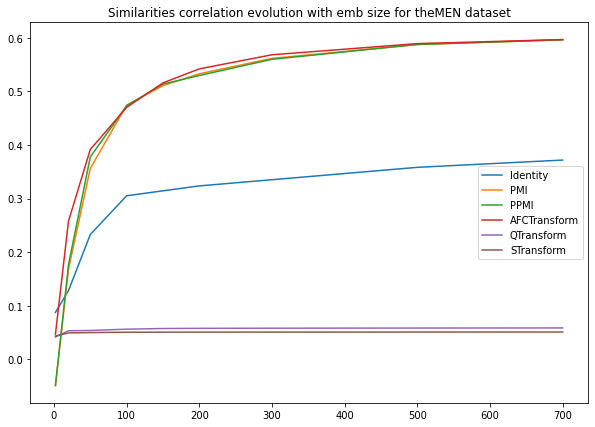

In [ ]:
res = evaluate_embedding_sizes_similarities(t8_tok, [2, 20, 50, 100, 150, 200, 300, 500, 700], 
                                      datasets_similarity["men_dataset"], "MEN", 
                                      transfs = transfs_list)

## Rarewords Dataset

TRANSFORMATION 0/6: Identity
***********************************************************
202 / 2034
(202,)
Embedding size : 2 => Correlation : 0.08530408207148114
202 / 2034
(202,)
Embedding size : 20 => Correlation : -0.013318251894496688
202 / 2034
(202,)
Embedding size : 50 => Correlation : 0.042422430533488376
202 / 2034
(202,)
Embedding size : 100 => Correlation : 0.05656046991062453
202 / 2034
(202,)
Embedding size : 150 => Correlation : 0.07290846720284784
202 / 2034
(202,)
Embedding size : 200 => Correlation : 0.06999343725101558
202 / 2034
(202,)
Embedding size : 300 => Correlation : 0.0789316810913791
202 / 2034
(202,)
Embedding size : 500 => Correlation : 0.1062363946018184
202 / 2034
(202,)
Embedding size : 700 => Correlation : 0.11747443969673345
TRANSFORMATION 1/6: PMI
***********************************************************
202 / 2034
(202,)
Embedding size : 2 => Correlation : 0.12320260946057808
202 / 2034
(202,)
Embedding size : 20 => Correlation : 0.058142290394587

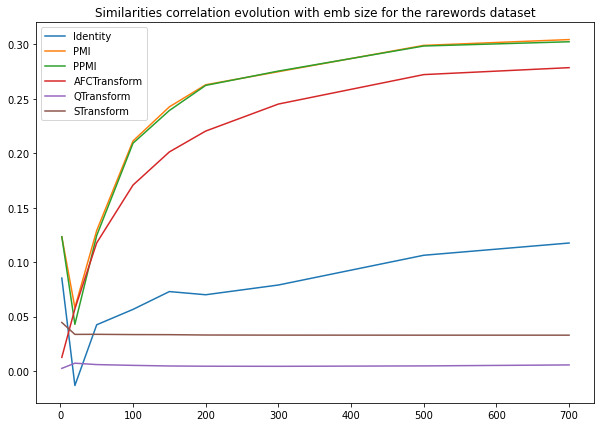

In [ ]:
res_rarewords = evaluate_embedding_sizes_similarities(t8_tok, [2, 20, 50, 100, 150, 200, 300, 500, 700], 
                                      datasets_similarity["rarewords"], " rarewords", 
                                      transfs = transfs_list)

# Corpus size

In [ ]:
len(t8_tok)

1701

  0%|          | 0/1701 [00:00<?, ?it/s]

2129 / 3000


  0%|          | 0/1701 [00:00<?, ?it/s]

1808 / 3000


  0%|          | 0/1701 [00:00<?, ?it/s]

1542 / 3000


  0%|          | 0/1701 [00:00<?, ?it/s]

1286 / 3000


  0%|          | 0/1701 [00:00<?, ?it/s]

1025 / 3000


  0%|          | 0/1701 [00:00<?, ?it/s]

889 / 3000


  0%|          | 0/1701 [00:00<?, ?it/s]

768 / 3000


  0%|          | 0/1701 [00:00<?, ?it/s]

471 / 3000


  0%|          | 0/1701 [00:00<?, ?it/s]

201 / 3000


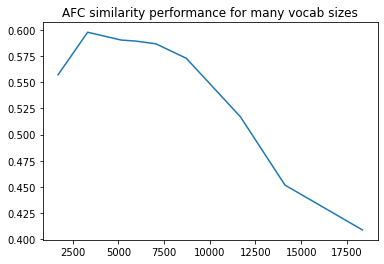

In [ ]:
import matplotlib.pyplot as plt
vocab_sizes = []
corrs = []
for mc in [50, 75, 100, 150, 200, 250, 300, 500, 1000]:
  s2vt = Svd2VecWithTransform(t8_tok, transformation = AFCTransform(), emb_size = 150, min_count = mc, window = 2)
  vocab_sizes.append(len(s2vt.word_to_vector))
  corrs.append(evaluate_wordembs_sim(s2vt, datasets_similarity["men_dataset"]))

plt.plot(vocab_sizes, corrs)
plt.title("AFC similarity performance for many vocab sizes")
plt.show()

25 DOCUMENTS


  0%|          | 0/25 [00:00<?, ?it/s]

4 / 3000
0.8227165490617128
50 DOCUMENTS


  0%|          | 0/50 [00:00<?, ?it/s]

23 / 3000
0.2874237787543878
100 DOCUMENTS


  0%|          | 0/100 [00:00<?, ?it/s]

74 / 3000
0.5176413383230335
150 DOCUMENTS


  0%|          | 0/150 [00:00<?, ?it/s]

161 / 3000
0.5503084196068709
200 DOCUMENTS


  0%|          | 0/200 [00:00<?, ?it/s]

224 / 3000
0.5298908190569591
250 DOCUMENTS


  0%|          | 0/250 [00:00<?, ?it/s]

324 / 3000
0.5515486702915212
300 DOCUMENTS


  0%|          | 0/300 [00:00<?, ?it/s]

389 / 3000
0.5804985273180843
350 DOCUMENTS


  0%|          | 0/350 [00:00<?, ?it/s]

472 / 3000
0.5766199170300161
400 DOCUMENTS


  0%|          | 0/400 [00:00<?, ?it/s]

533 / 3000
0.5811622537179163
450 DOCUMENTS


  0%|          | 0/450 [00:00<?, ?it/s]

614 / 3000
0.5921869310498112
500 DOCUMENTS


  0%|          | 0/500 [00:00<?, ?it/s]

674 / 3000
0.5948636219351284
550 DOCUMENTS


  0%|          | 0/550 [00:00<?, ?it/s]

721 / 3000
0.5893841773330596
600 DOCUMENTS


  0%|          | 0/600 [00:00<?, ?it/s]

806 / 3000
0.6144876513947288
650 DOCUMENTS


  0%|          | 0/650 [00:00<?, ?it/s]

873 / 3000
0.6154886564308792
700 DOCUMENTS


  0%|          | 0/700 [00:00<?, ?it/s]

932 / 3000
0.6078298641713735
1000 DOCUMENTS


  0%|          | 0/1000 [00:00<?, ?it/s]

1169 / 3000
0.583878220370808
1200 DOCUMENTS


  0%|          | 0/1200 [00:00<?, ?it/s]

1268 / 3000
0.5638586136892266
1500 DOCUMENTS


  0%|          | 0/1500 [00:00<?, ?it/s]

1429 / 3000
0.5544790578673027
1701 DOCUMENTS


  0%|          | 0/1701 [00:00<?, ?it/s]

1542 / 3000
0.5170673556978703


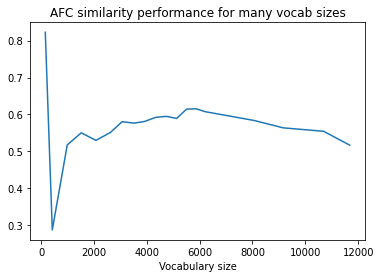

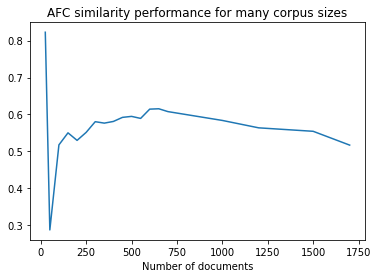

In [ ]:
vocab_sizes = []
ndocs_list = [25, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 1000, 1200, 1500, 1701]
corrs = []
for ndocs in ndocs_list:
  print("{} DOCUMENTS".format(ndocs))
  s2vt = Svd2VecWithTransform(t8_tok[:ndocs], transformation = AFCTransform(), emb_size = 150, min_count = 100, window = 2)
  vocab_sizes.append(len(s2vt.word_to_vector))
  corr = evaluate_wordembs_sim(s2vt, datasets_similarity["men_dataset"])
  corrs.append(corr)
  print(corr)

plt.plot(vocab_sizes, corrs)
plt.title("AFC similarity performance for many vocab sizes")
plt.xlabel("Vocabulary size")
plt.show()

plt.plot(ndocs_list, corrs)
plt.xlabel("Number of documents")
plt.title("AFC similarity performance for many corpus sizes")
plt.show()

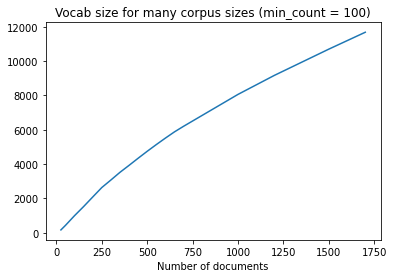

In [ ]:
plt.plot(ndocs_list, vocab_sizes)
plt.xlabel("Number of documents")
plt.title("Vocab size for many corpus sizes (min_count = 100)")
plt.show()

# Word2Vec

In [ ]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

corpus = api.load('text8')  # download the corpus and return it opened as an iterable
model = Word2Vec(corpus, size = 150, min_count = 100, window = 2)  # train a model from the corpus

In [ ]:
def get_pred_sims_w2vc(w2vc, df_sims):
  pred_sims = []
  nb_kept = 0
  idx_to_keep = []
  for i in range(df_sims.shape[0]):
    w1, w2 = df_sims["w1"][i], df_sims["w2"][i]
    if w1 in list(w2vc.wv.vocab) and w2 in list(w2vc.wv.vocab):
      pred_sims.append(w2vc.similarity(w1, w2))
      nb_kept += 1
      idx_to_keep.append(i)
  print(nb_kept, "/", df_sims.shape[0])
  return pred_sims, idx_to_keep

  
def evaluate_wordembs_sim_w2vc(w2vc, df_sims):
  pred_sims, idx_to_keep = get_pred_sims_w2vc(w2vc, df_sims)
  real_sims = df_sims["sim"][idx_to_keep]
  print(real_sims.shape)
  return np.corrcoef(real_sims, pred_sims)[0, 1]

In [ ]:
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim_w2vc(model, datasets_similarity[dataset]))
  print()

wordsim353
267 / 353
(267,)
0.6182595586297659

mturk
221 / 287
(221,)
0.605788768204149

rarewords
205 / 2034
(205,)
0.4155843172819447

simlex999
726 / 999
(726,)
0.2601050631426083

men_dataset
1544 / 3000
(1544,)
0.5867400082065027



#### Similarité

In [ ]:
model.most_similar("friday")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wednesday', 0.8369299173355103),
 ('thursday', 0.8281697630882263),
 ('saturday', 0.7968717217445374),
 ('monday', 0.7884709239006042),
 ('sunday', 0.7871717214584351),
 ('evening', 0.7659758925437927),
 ('morning', 0.7657150626182556),
 ('tuesday', 0.7599111199378967),
 ('afternoon', 0.7345110774040222),
 ('easter', 0.7154706716537476)]

In [ ]:
model.similarity("queen", "king")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7172427

In [ ]:
model.similarity("man", "woman")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7429405

In [ ]:
model.similarity("man", "boy")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.55481625

In [ ]:
model.similarity("monday", "friday")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7884709

In [ ]:
model.similarity("fish", "sun")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.0074798614

In [ ]:
model.similarity("moon", "sun")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7469312

In [ ]:
model.similarity("friday", "banana")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.036455613

#### Analogie

In [ ]:
print(api.load("20-newsgroups", return_path=True))  # output: /home/user/gensim-data/20-newsgroups/20-newsgroups.gz
print(api.load("text8", return_path=True))  # output: /home/user/gensim-data/text8/text8.gz
print(api.load("fake-news", return_path=True))  # output: /home/user/gensim-data/fake-news/fake-news.gz

[==================================================] 100.1% 13.8/13.8MB downloaded
/Users/lazharlabiod/gensim-data/20-newsgroups/20-newsgroups.gz
/Users/lazharlabiod/gensim-data/text8/text8.gz
[==================================================] 100.0% 19.2/19.2MB downloaded
/Users/lazharlabiod/gensim-data/fake-news/fake-news.gz


In [ ]:
corpus = api.load('20-newsgroups')  # download the corpus and return it opened as an iterable

In [ ]:
model = Word2Vec(corpus)  # train a model from the corpus

In [ ]:
type(model.vocabulary)
model.vocabulary

In [ ]:
model.wv.vectors.shape
#print(model.wv.vectors)
print(model.wv.vocab.keys)
type(model.wv.vocab)
model.wv.vocab.keys

<built-in method keys of dict object at 0x7f9a6026ba80>


<function dict.keys>

# Evaluation Analogie et similarité sur les l'acp


## PPMI

In [ ]:
def get_pred_sims(s2vt, df_sims):
  pred_sims = []
  nb_kept = 0
  idx_to_keep = []
  for i in range(df_sims.shape[0]):
    w1, w2 = df_sims["w1"][i], df_sims["w2"][i]
    if w1 in s2vt.word_to_vector and w2 in s2vt.word_to_vector:
      pred_sims.append(s2vt.get_similarity(w1, w2))
      nb_kept += 1
      idx_to_keep.append(i)
  print(nb_kept, "/", df_sims.shape[0])
  return pred_sims, idx_to_keep

def evaluate_wordembs_sim(s2vt, df_sims):
  pred_sims, idx_to_keep = get_pred_sims(s2vt, df_sims)
  real_sims = df_sims["sim"][idx_to_keep]
  print(real_sims.shape)
  return np.corrcoef(real_sims, pred_sims)[0, 1]
  

In [ ]:
def get_pred_sims_w2vc(w2vc, df_sims):
  pred_sims = []
  nb_kept = 0
  idx_to_keep = []
  for i in range(df_sims.shape[0]):
    w1, w2 = df_sims["w1"][i], df_sims["w2"][i]
    if w1 in list(w2vc.wv.vocab) and w2 in list(w2vc.wv.vocab):
      pred_sims.append(w2vc.similarity(w1, w2))
      nb_kept += 1
      idx_to_keep.append(i)
  print(nb_kept, "/", df_sims.shape[0])
  return pred_sims, idx_to_keep


  
def evaluate_wordembs_sim_w2vc(w2vc, df_sims):
  pred_sims, idx_to_keep = get_pred_sims_w2vc(w2vc, df_sims)
  real_sims = df_sims["sim"][idx_to_keep]
  print(real_sims.shape)
  return np.corrcoef(real_sims, pred_sims)[0, 1]

In [ ]:
model = Word2Vec(data,size=3, window=2,min_count=1)  # train a model from the corpus
evaluate_wordembs_sim_w2vc(model,df)

427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


0.3943652814473514

In [ ]:
  def compute_cosine_similarity(u, v, eps = 10**(-5)):
    return u.dot(v)/ (np.linalg.norm(u) * np.linalg.norm(v) + eps)

In [ ]:
def get_pred_sims_pca(pca, df_sims, word_to_vector):
  pred_sims = []
  nb_kept = 0
  idx_to_keep = []
  for i in range(df_sims.shape[0]):
    w1, w2 = df_sims["w1"][i], df_sims["w2"][i]
    if w1 in list(word_to_vector) and w2 in list(word_to_vector):
      pred_sims.append(compute_cosine_similarity(pca[list(word_to_vector).index(w1)], pca[list(word_to_vector).index(w2)]))
      nb_kept += 1
      idx_to_keep.append(i)
  print(nb_kept, "/", df_sims.shape[0])
  return pred_sims, idx_to_keep


  
def evaluate_wordembs_sim_pca(mat,df_sims,word_to_vector):
  pred_sims, idx_to_keep = get_pred_sims_pca(mat, df_sims,word_to_vector)
  real_sims = df_sims["sim"][idx_to_keep]
  print(real_sims.shape)
  return np.corrcoef(real_sims, pred_sims)[0, 1]

In [ ]:
words_list = []
wordvecs_list = []
for word in s2vt["ppmi"].word_to_context:
  words_list.append(word)
  wordvecs_list.append(s2vt["ppmi"].word_to_context[word])
words_vecs_mat = np.stack(wordvecs_list)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
res = pca.fit_transform(words_vecs_mat)

In [ ]:
import pandas as pd
datasets_similarity = dict()
datasets_similarity["wordsim353"] = pd.read_csv("datasets/similarities/wordsim353.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["mturk"] = pd.read_csv("datasets/similarities/mturk.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["rarewords"] = pd.read_csv("datasets/similarities/rarewords.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["simlex999"] = pd.read_csv("datasets/similarities/simlex999.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["men_dataset"] = pd.read_csv("datasets/similarities/men_dataset.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])

datasets_similarity["mturk"].head()

,w1,w2,sim
0,episcopal,russia,2.750000
1,water,shortage,2.714286
2,horse,wedding,2.266667
3,plays,losses,3.200000
4,classics,advertiser,2.250000


In [ ]:
word_to_vector=s2vt["ppmi"].word_to_vector
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim_pca(res,datasets_similarity[dataset],word_to_vector))
  print()

wordsim353
267 / 353
(267,)
0.6105214368547514

mturk
221 / 287
(221,)
0.6235200896182409

rarewords
202 / 2034
(202,)
0.36975332014910417

simlex999
724 / 999
(724,)
0.10736204695206347

men_dataset
1542 / 3000
(1542,)
0.6362389037933914



In [ ]:
import pandas as pd
datasets_analogy = dict()
datasets_analogy["msr"] = pd.read_csv("datasets/analogies/msr.txt", sep=" ", skiprows = 1, names=["w1", "w2", "v1", "v2"])
#datasets_analogy["questions-words"] = pd.read_csv("datasets/similarities/questions-words.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_analogy["msr"].head()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
res = pca.fit_transform(words_vecs_mat)

In [ ]:
  def get_analogy( w1, w2, v1,word_to_vector, k = 10): # w1 is to w2 as v1 is to ??? (w1 -> w2, v1 -> ?)
    vec_w1 = word_to_vector[w1]
    vec_w2 = word_to_vector[w2]
    vec_v1 = word_to_vector[v1]

    to_compare = vec_w2/np.linalg.norm(vec_w2) - vec_w1/np.linalg.norm(vec_w1) + vec_v1/np.linalg.norm(vec_v1)

    tkfinder = TopKFinder(k)
    for word in word_to_vector:
      if word == w1 or word == w2 or word == v1:
        continue
      wordvec = word_to_vector[word]
      wordvec = wordvec/np.linalg.norm(wordvec)
      sim = compute_cosine_similarity(wordvec, to_compare)
      tkfinder.add(word, sim)

    return tkfinder.get_topk()

In [ ]:
def evaluate_wordembs_analogy(res, df_analogies,word_to_vector, topk = 1):
  nb_kept = 0
  idx_to_keep = []
  topk_dict = dict()
  for i in range(topk):
    topk_dict[i + 1] = 0
  for i in tqdm_notebook(range(df_analogies.shape[0])):
    w1, w2, v1, v2 = df_analogies["w1"][i], df_analogies["w2"][i], df_analogies["v1"][i], df_analogies["v2"][i]
    if w1 in word_to_vector and w2 in word_to_vector and v1 in word_to_vector and v2 in word_to_vector:
      analogy_res = [t[0] for t in get_analogy(w1, w2, v1,word_to_vector, k = topk)]
      
      for kk in range(len(analogy_res)):
        if analogy_res[kk] == v2:
          for j in range(kk, topk):
            topk_dict[j + 1]+= 1
          break
      nb_kept += 1
      idx_to_keep.append(i)
  print(nb_kept, "/", df_analogies.shape[0])
  for top in range(topk):
    print("Top {} Accuracy : {:.2f} %".format(top + 1, 100 * topk_dict[top + 1] / nb_kept))

In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(res, datasets_analogy[dataset], word_to_vector,topk = 7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 17.49 %
Top 2 Accuracy : 25.82 %
Top 3 Accuracy : 30.85 %
Top 4 Accuracy : 34.29 %
Top 5 Accuracy : 36.43 %
Top 6 Accuracy : 38.53 %
Top 7 Accuracy : 40.46 %


## AFC

In [ ]:
import numpy as np
s2vt["afc"] = Svd2VecWithTransform(t8_tok, transformation = AFCTransform(), emb_size = 300, min_count = 100, window = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/1701 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/1701 [00:00<?, ?it/s]

(11676, 11676)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



u,s,v shapes (11676, 300) (300,) (300, 11676)


In [ ]:
words_list = []
wordvecs_list = []
for word in s2vt["afc"].word_to_context:
  words_list.append(word)
  wordvecs_list.append(s2vt["afc"].word_to_context[word])
words_vecs_mat = np.stack(wordvecs_list)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
res = pca.fit_transform(words_vecs_mat)

In [ ]:
import pandas as pd
datasets_similarity = dict()
datasets_similarity["wordsim353"] = pd.read_csv("datasets/similarities/wordsim353.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["mturk"] = pd.read_csv("datasets/similarities/mturk.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["rarewords"] = pd.read_csv("datasets/similarities/rarewords.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["simlex999"] = pd.read_csv("datasets/similarities/simlex999.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_similarity["men_dataset"] = pd.read_csv("datasets/similarities/men_dataset.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])

datasets_similarity["mturk"].head()

,w1,w2,sim
0,episcopal,russia,2.750000
1,water,shortage,2.714286
2,horse,wedding,2.266667
3,plays,losses,3.200000
4,classics,advertiser,2.250000


In [ ]:
word_to_vector=s2vt["afc"].word_to_vector
for dataset in datasets_similarity:
  print(dataset)
  print(evaluate_wordembs_sim_pca(res,datasets_similarity[dataset],word_to_vector))
  print()

wordsim353
267 / 353
(267,)
0.6125274429569066

mturk
221 / 287
(221,)
0.6348229000537574

rarewords
202 / 2034
(202,)
0.3888388947032951

simlex999
724 / 999
(724,)
0.1278147531519069

men_dataset
1542 / 3000
(1542,)
0.6250523586215021



In [ ]:
import pandas as pd
datasets_analogy = dict()
datasets_analogy["msr"] = pd.read_csv("datasets/analogies/msr.txt", sep=" ", skiprows = 1, names=["w1", "w2", "v1", "v2"])
#datasets_analogy["questions-words"] = pd.read_csv("datasets/similarities/questions-words.txt", sep = "\t", skiprows = 2, names=["w1", "w2", "sim"])
datasets_analogy["msr"].head()

,w1,w2,v1,v2
0,good,better,rough,rougher
1,better,good,rougher,rough
2,good,best,rough,roughest
3,best,good,roughest,rough
4,best,better,roughest,rougher


In [ ]:
for dataset in datasets_analogy:
  evaluate_wordembs_analogy(res, datasets_analogy[dataset], word_to_vector,topk = 7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/8000 [00:00<?, ?it/s]

3374 / 8000
Top 1 Accuracy : 21.78 %
Top 2 Accuracy : 31.98 %
Top 3 Accuracy : 36.81 %
Top 4 Accuracy : 40.93 %
Top 5 Accuracy : 44.19 %
Top 6 Accuracy : 46.44 %
Top 7 Accuracy : 48.13 %


# Simulation

#### Data génération

In [ ]:
fruits =  ["abricot","pêche","pomme","poire","ananas","mangue", "pamplemousse", "orange", "clémentine"]
legumes = ["artichaut","chou-fleur","brocoli","haricot","petit-pois","lentille"]
métal = ["fer","acier","plomb","or","argent","platine"]

In [ ]:
fruits = {
    "noyau":["abricot","pêche","prune","cerise"],
    "pépin":["pomme","poire","raisin","coing"],
    "éxotique":["ananas","mangue","papaye"],
    "agrume":["pamplemousse", "orange", "clémentine","citron"]
}
legumes = {
    "fleur":["artichaut","chou-fleur","brocoli"],
    "graine":["haricot","petit-pois","lentille","mais","feve"]
}

métal = {
    "précieux":["fer","acier","plomb"],
    "non-précieux":["argent","gold","platine"]
}


In [ ]:
def getList(dict):
    list = []
    for key in dict.keys():
        list.append(key)
          
    return list
print(getList(fruits))

['noyau', 'pépin', 'éxotique', 'agrume']


#### Sim génération Génération

In [ ]:
types = [métal,fruits,legumes]
W1 = []
W2 = []
sim = []
for elem in types:
  for key in getList(elem):
    for i in range(0,len(elem[key])-1):
      for j in range(i,len(elem[key])):
        W1.append(elem[key][i])
        W2.append(elem[key][j])
        sim.append(0.95)
for elem in types:
  for i in range(0, len(getList(elem))-1):
    for value in elem[getList(elem)[i]]:
      for j in range(i+1,len(getList(elem))):
        for value2 in elem[getList(elem)[j]]:
          W1.append(value)
          W2.append(value2)
          sim.append(0.7)

for i in range(0,len(types)-1):
  for key in getList(types[i]):
    for value in types[i][key]:
      for j in range(i+1, len(types)):
        for key2 in getList(types[j]):
          for value2 in types[j][key2]:
            W1.append(value)
            W2.append(value2)
            sim.append(0)





In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(W1,W2,sim)), columns=["w1","w2","sim"])
df.head()

,w1,w2,sim
0,fer,fer,0.95
1,fer,acier,0.95
2,fer,plomb,0.95
3,acier,acier,0.95
4,acier,plomb,0.95


#### dataset génération

In [ ]:
import numpy as np
from tqdm import tqdm_notebook

In [ ]:
from numpy.random.mtrand import f
import random
data = []
types = [métal,fruits,legumes]
for i in tqdm_notebook(range(1000)):
  dicto = random.choice(types)
  for key in getList(dicto):
    doc = ""
    for j in range(3):
      boo = True
      while(boo):
        word = random.choice(dicto[key])
        if word in doc:
          word = random.choice(dicto[key])
        else :
          doc+=" "+word
          boo = False
    data.append(doc)
  if (random.randint(1,100)>40):
    elem1=random.choice(getList(dicto))
    boo = True
    while(boo):
      elem2=random.choice(getList(dicto))
      if (elem2==elem1):
        elem2=random.choice(getList(dicto))
      else:
        boo = False
    doc = ""
    for j in range(random.randint(2,4)):
      doc+=" "+random.choice(dicto[elem1])+" "+random.choice(dicto[elem2])
    data.append(doc)
  if (random.randint(1,100)>95):
    dicto1 = random.choice(types)
    boo = True
    while(boo):
      dicto2=random.choice(types)
      if (dicto1==dicto2):
        dicto2 = random.choice(types)
      else:
        boo = False
    elem1=random.choice(getList(dicto1))
    elem2=random.choice(getList(dicto2))
    doc = ""
    for j in range(random.randint(2,4)):
      doc+=" "+random.choice(dicto1[elem1])+" "+random.choice(dicto2[elem2])
    data.append(doc)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
len(data)

3316

In [ ]:
data = [t.split(" ") for t in data]
for liste in data:
  del liste[0]
data

[['fer', 'acier', 'plomb'],
 ['platine', 'argent', 'gold'],
 ['prune', 'pêche', 'cerise'],
 ['pomme', 'coing', 'poire'],
 ['mangue', 'papaye', 'ananas'],
 ['orange', 'citron', 'clémentine'],
 ['prune', 'pêche', 'cerise'],
 ['coing', 'raisin', 'poire'],
 ['papaye', 'mangue', 'ananas'],
 ['citron', 'clémentine', 'orange'],
 ['raisin',
  'orange',
  'coing',
  'orange',
  'raisin',
  'orange',
  'raisin',
  'orange'],
 ['brocoli', 'artichaut', 'chou-fleur'],
 ['lentille', 'haricot', 'mais'],
 ['mais', 'artichaut', 'feve', 'chou-fleur', 'mais', 'brocoli'],
 ['chou-fleur', 'brocoli', 'artichaut'],
 ['petit-pois', 'mais', 'feve'],
 ['brocoli', 'artichaut', 'chou-fleur'],
 ['lentille', 'haricot', 'feve'],
 ['haricot', 'artichaut', 'feve', 'artichaut', 'feve', 'chou-fleur'],
 ['plomb', 'fer', 'acier'],
 ['platine', 'gold', 'argent'],
 ['platine', 'acier', 'gold', 'plomb', 'argent', 'acier'],
 ['plomb', 'acier', 'fer'],
 ['platine', 'argent', 'gold'],
 ['plomb', 'acier', 'fer'],
 ['gold', 'arge

#### transformations matrix

In [ ]:
doc2count = Co_Occ(data, window_size_bef_af = 2, min_count = 1)
s2vt["identity"] = Svd2VecWithTransform(data, emb_size=emb_size,min_count = 1, window = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3379 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3379 [00:00<?, ?it/s]

  0%|          | 0/3379 [00:00<?, ?it/s]

  0%|          | 0/3379 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


### Résultats similarité

In [ ]:
import numpy as np
s2vt = dict()
emb_size=3
s2vt["identity"] = Svd2VecWithTransform(data, emb_size=emb_size,min_count = 1, window = 2)
s2vt["ppmi"] = Svd2VecWithTransform(data, transformation = PPMITransform(),min_count = 1, emb_size = emb_size, window = 2)
s2vt["pmi"] = Svd2VecWithTransform(data, transformation = PMITransform(),min_count = 1, emb_size = emb_size, window = 2)
s2vt["qtransform"] = Svd2VecWithTransform(data, transformation = QTransform(), emb_size = emb_size, min_count = 1, window = 2)
s2vt["STransform"] = Svd2VecWithTransform(data, transformation = STransform(), emb_size = emb_size, min_count = 1, window = 2)
s2vt["AFCTransform"] = Svd2VecWithTransform(data, transformation = AFCTransform(), emb_size = emb_size, min_count = 1, window = 2)
s2vt["SAlphaTransform_0"] = Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0), emb_size = emb_size, min_count = 1, window = 2)
s2vt["SAlphaTransform_0.25"] = Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0.25), emb_size = emb_size, min_count = 1, window = 2)
s2vt["SAlphaTransform_0.5"] = Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0.5), emb_size = emb_size, min_count = 1, window = 2)
s2vt["SAlphaTransform_0.75"] = Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0.75), emb_size = emb_size, min_count = 1, window = 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


#### Visualisation variation de la taille d'embbedding de 2 jusqu'a 15

In [ ]:
correls=[]
taille_emb=[]
transformation = []
for emb in range (2,15,1):
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, emb_size=emb,min_count = 1, window = 2),df))
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = PPMITransform(),min_count = 1, emb_size = emb, window = 2),df))
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = PMITransform(),min_count = 1, emb_size = emb, window = 2),df))
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = QTransform(), emb_size = emb, min_count = 1, window = 2),df))
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = STransform(), emb_size = emb, min_count = 1, window = 2),df))
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = AFCTransform(), emb_size = emb, min_count = 1, window = 2),df))
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0), emb_size = emb, min_count = 1, window = 2),df))
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0.25), emb_size = emb, min_count = 1, window = 2),df))
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0.5), emb_size = emb, min_count = 1, window = 2),df))
  correls.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0.75), emb_size = emb, min_count = 1, window = 2),df))
  for i in getList(s2vt):
    transformation.append(i)
    taille_emb.append(emb)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 11) (11,) (11, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 12) (12,) (12, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 13) (13,) (13, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(29, 29)
u,s,v shapes (29, 14) (14,) (14, 29)
427 / 427
(427,)


In [ ]:
res = pd.DataFrame(list(zip(correls,taille_emb,transformation)), columns=["corrélation","taille_emb","transformation"])
res.loc[res['transformation'] == "identity"]

,corrélation,taille_emb,transformation
0,0.627115,2,identity
10,0.981169,3,identity
20,0.916040,4,identity
30,0.913870,5,identity
40,0.854127,6,identity
50,0.818642,7,identity
60,0.832288,8,identity
70,0.832246,9,identity
80,0.832139,10,identity
90,0.830493,11,identity


In [ ]:
import plotly.express as px
fig = px.line(res, x="taille_emb", y="corrélation", color="transformation",
        line_shape="spline", render_mode="svg")
fig.show()

#### Visualisation variation de alpha avec un step de 0.05

In [ ]:
import numpy as np
s2vt = dict()
emb_size=3
s2vt["identity"] = Svd2VecWithTransform(data, emb_size=emb_size,min_count = 1, window = 2)
s2vt["ppmi"] = Svd2VecWithTransform(data, transformation = PPMITransform(),min_count = 1, emb_size = emb_size, window = 2)
s2vt["pmi"] = Svd2VecWithTransform(data, transformation = PMITransform(),min_count = 1, emb_size = emb_size, window = 2)
s2vt["qtransform"] = Svd2VecWithTransform(data, transformation = QTransform(), emb_size = emb_size, min_count = 1, window = 2)
s2vt["STransform"] = Svd2VecWithTransform(data, transformation = STransform(), emb_size = emb_size, min_count = 1, window = 2)
s2vt["AFCTransform"] = Svd2VecWithTransform(data, transformation = AFCTransform(), emb_size = emb_size, min_count = 1, window = 2)
s2vt["SAlphaTransform_0"] = Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0), emb_size = emb_size, min_count = 1, window = 2)
s2vt["SAlphaTransform_0.3"] = Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0.3), emb_size = emb_size, min_count = 1, window = 2)
s2vt["SAlphaTransform_0.5"] = Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0.5), emb_size = emb_size, min_count = 1, window = 2)
s2vt["SAlphaTransform_0.75"] = Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=0.75), emb_size = emb_size, min_count = 1, window = 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


  0%|          | 0/3316 [00:00<?, ?it/s]

  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`




u,s,v shapes (29, 3) (3,) (3, 29)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3316 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



##### Variation des alpha 

In [ ]:
import plotly.express as px
salpha_res=[]
alpha_range=[]
for embsize in range (2,15,1):
  salpha_res=[]
  alpha_range=[]
  for alpha in range (0,20,1):
    alpha_range.append(alpha*0.05)
    salpha_res.append(evaluate_wordembs_sim(Svd2VecWithTransform(data, transformation = SAlphaTransform(alpha=alpha*0.05), emb_size = embsize, min_count = 1, window = 2), df))
  res = pd.DataFrame(list(zip(alpha_range,salpha_res)), columns=["alpha","corrélation"])
  fig = px.line(res, x="alpha", y="corrélation",title = embsize,line_shape="spline", render_mode="svg")
  fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 2) (2,) (2, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 3) (3,) (3, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 4) (4,) (4, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 5) (5,) (5, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 6) (6,) (6, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 7) (7,) (7, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 8) (8,) (8, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 9) (9,) (9, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(29, 29)
u,s,v shapes (29, 10) (10,) (10, 29)
427 / 427
(427,)


  0%|          | 0/3309 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3309 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
res = pd.DataFrame(list(zip(alpha_range,salpha_res)), columns=["alpha","corrélation"])
res.head()

#### Barplot taille embedding == 3

In [ ]:
résultats = []
for key in s2vt.keys():
  résultats.append(evaluate_wordembs_sim(s2vt[key], df))

ress = pd.DataFrame(list(zip(getList(s2vt),résultats)), columns=["Transformation","corrélation"])
ress.head()

427 / 427
(427,)
427 / 427
(427,)
427 / 427
(427,)
427 / 427
(427,)
427 / 427
(427,)
427 / 427
(427,)
427 / 427
(427,)
427 / 427
(427,)
427 / 427
(427,)
427 / 427
(427,)


,Transformation,corrélation
0,identity,0.981169
1,ppmi,0.590409
2,pmi,0.590409
3,qtransform,0.664002
4,STransform,0.725518


In [ ]:
fig = px.bar(ress, x='Transformation', y='corrélation')
fig.show()

### VISUALISATION

In [ ]:
words_list = []
wordvecs_list = []
for word in s2vt["ppmi"].word_to_context:
  words_list.append(word)
  wordvecs_list.append(s2vt["ppmi"].word_to_context[word])
words_vecs_mat = np.stack(wordvecs_list)

In [ ]:
dicts = dict()
dicts["fruits"]=fruits
dicts["legumes"]=legumes
dicts["métal"]=métal

In [ ]:
clusters = []
sous_clusters = []
for word in words_list:
  for elem in dicts:
    for dicto in getList(dicts[elem]):
      for val in dicts[elem][dicto] :
        if word == val:
          clusters.append(elem)
          sous_clusters.append(dicto)


In [ ]:
import plotly.express as px
for key in s2vt.keys():
  words_list = []
  wordvecs_list = []
  for word in s2vt[key].word_to_context:
    words_list.append(word)
    wordvecs_list.append(s2vt[key].word_to_context[word])
  words_vecs_mat = np.stack(wordvecs_list)
  fig = px.scatter(x=words_vecs_mat[:,0], y=words_vecs_mat[:,2], color= clusters, symbol=sous_clusters,  title=key)
  fig.show()

# GRAPHES

In [ ]:
import matplotlib.pyplot as plt

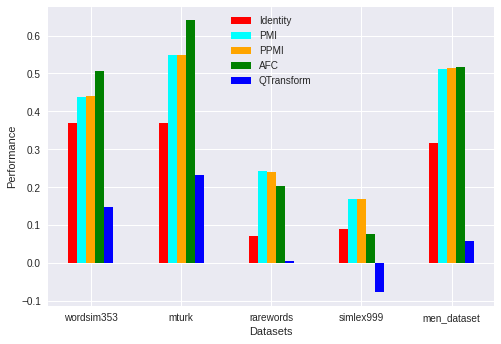

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
labels = ['wordsim353', 'mturk', 'rarewords', 'simlex999', 'men_dataset']
identity = [0.369, 0.3698, 0.0712, 0.0887, 0.3157]
pmi = [0.4387, 0.5484, 0.2422, 0.1685, 0.5106]
ppmi = [0.4415, 0.5486, 0.2406, 0.1693, 0.5148]
afc = [0.5072, 0.6400, 0.2022, 0.0775, 0.5178]
qtran = [0.1473, 0.2311, 0.0046, -0.0771, 0.0572]
stran = [0.1439, 0.0998, 0.0333, -0.0346, 0.0504]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

width = 0.1

plt.style.use('seaborn')

# plot data in grouped manner of bar type
plt.bar(x-0.2, identity, width, color='red')
plt.bar(x-0.1, pmi, width, color='cyan')
plt.bar(x, ppmi, width, color='orange')
plt.bar(x+0.1, afc, width, color='green')
plt.bar(x+0.2, qtran, width, color='blue')

plt.xticks(x, labels)
plt.xlabel("Datasets")
plt.ylabel("Performance")
plt.legend(["Identity", "PMI", "PPMI", "AFC", "QTransform"])
plt.show()

In [ ]:
import plotly.graph_objects as go

w2vres = [0.6182, 0.6057, 0.4155, 0.2601, 0.5867]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=labels,
    y=identity,
    name='Identity',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=labels,
    y=pmi,
    name='PMI',
    marker_color='lightsalmon'
))

fig.add_trace(go.Bar(
    x=labels,
    y=ppmi,
    name='PPMI',
    marker_color='dodgerblue'
))

fig.add_trace(go.Bar(
    x=labels,
    y=afc,
    name='AFC',
    marker_color='indigo'
))

fig.add_trace(go.Bar(
    x=labels,
    y=qtran,
    name='QTransform',
    marker_color='lightgreen'
))

fig.add_trace(go.Bar(
    x=labels,
    y=stran,
    name='STransform',
    marker_color='chocolate'
))

fig.add_trace(go.Bar(
    x=labels,
    y=w2vres,
    name='Word2Vec',
    marker_color='darkgrey'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, font = dict(size = 25), height = 800)
fig.show()

In [ ]:
import plotly.graph_objects as go

labels = ['TOP1', 'TOP2', 'TOP3', 'TOP4', 'TOP5', 'TOP6', 'TOP7']
identity = [0.0536, 0.0785, 0.0922, 0.1046, 0.1129, 0.1230, 0.1304]
pmi = [0.0957, 0.1411, 0.1766, 0.2045, 0.2261, 0.2448, 0.2564]
ppmi = [0.0966, 0.1446, 0.1823, 0.2084, 0.2267, 0.2436, 0.2558]
afc = [0.0474, 0.0705, 0.0854, 0.0984, 0.1126, 0.1236, 0.1375]
qtran = [0.0089, 0.0130, 0.0178, 0.0246, 0.0290, 0.0314, 0.0356]
stran = [0.0098, 0.0148, 0.0202, 0.0240, 0.0273, 0.0311, 0.0344]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=labels,
    y=identity,
    name='Identity',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=labels,
    y=pmi,
    name='PMI',
    marker_color='lightsalmon'
))

fig.add_trace(go.Bar(
    x=labels,
    y=ppmi,
    name='PPMI',
    marker_color='dodgerblue'
))

fig.add_trace(go.Bar(
    x=labels,
    y=afc,
    name='AFC',
    marker_color='indigo'
))

fig.add_trace(go.Bar(
    x=labels,
    y=qtran,
    name='QTransform',
    marker_color='lightgreen'
))

fig.add_trace(go.Bar(
    x=labels,
    y=stran,
    name='STransform',
    marker_color='chocolate'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, font = dict(size = 25), height = 800)
fig.show()